##Deep Learning Lab

 Week2

Aditi Desai

200968126

#Metadata:

The variables listed below, from left to right, are:

Density determined from underwater weighing
Percent body fat from Siri's (1956) equation

Age (years)

Weight (lbs)

Height (inches)

Neck circumference (cm)

Chest circumference (cm)

Abdomen 2 circumference (cm)

Hip circumference (cm)

Thigh circumference (cm)

Knee circumference (cm)

Ankle circumference (cm)

Biceps (extended) circumference (cm)

Forearm circumference (cm)

Wrist circumference (cm)

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('bodyfat.csv')
data

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [ ]:
data.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

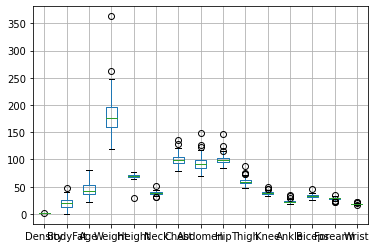

In [ ]:
data.boxplot()

In [ ]:
data.corr()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
Density,1.000000,-0.987782,-0.277637,-0.594062,0.097881,-0.472966,-0.682599,-0.798955,-0.609331,-0.553091,-0.495040,-0.264890,-0.487109,-0.351648,-0.325716
BodyFat,-0.987782,1.000000,0.291458,0.612414,-0.089495,0.490592,0.702620,0.813432,0.625201,0.559608,0.508665,0.265970,0.493271,0.361387,0.346575
Age,-0.277637,0.291458,1.000000,-0.012746,-0.171645,0.113505,0.176450,0.230409,-0.050332,-0.200096,0.017516,-0.105058,-0.041162,-0.085056,0.213531
Weight,-0.594062,0.612414,-0.012746,1.000000,0.308279,0.830716,0.894191,0.887995,0.940884,0.868694,0.853167,0.613685,0.800416,0.630301,0.729775
Height,0.097881,-0.089495,-0.171645,0.308279,1.000000,0.253710,0.134892,0.087813,0.170394,0.148436,0.286053,0.264744,0.207816,0.228649,0.322065
Neck,-0.472966,0.490592,0.113505,0.830716,0.253710,1.000000,0.784835,0.754077,0.734958,0.695697,0.672405,0.477892,0.731146,0.623660,0.744826
Chest,-0.682599,0.702620,0.176450,0.894191,0.134892,0.784835,1.000000,0.915828,0.829420,0.729859,0.719496,0.482988,0.727907,0.580173,0.660162
Abdomen,-0.798955,0.813432,0.230409,0.887995,0.087813,0.754077,0.915828,1.000000,0.874066,0.766624,0.737179,0.453223,0.684983,0.503316,0.619832
Hip,-0.609331,0.625201,-0.050332,0.940884,0.170394,0.734958,0.829420,0.874066,1.000000,0.896410,0.823473,0.558387,0.739273,0.545014,0.630090
Thigh,-0.553091,0.559608,-0.200096,0.868694,0.148436,0.695697,0.729859,0.766624,0.896410,1.000000,0.799170,0.539797,0.761477,0.566842,0.558685


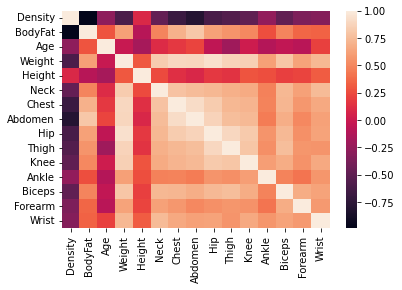

In [ ]:
sns.heatmap(data.corr())

# Constructing Model

Train_Validate_Test split:

Apart from train test,

Valid Dataset
Set of data used to provide an unbiased evaluation of a model fitted on the training dataset while tuning model hyperparameters.
Also play a role in other forms of model preparation, such as feature selection, threshold cut-off selection.

-Models with very few hyper-parameters will be easy to validate and tune, so you can probably reduce the size of your validation set.

-But if your model has many hyper-parameters, you would want to have a significant validation set as well.

-If you happen to have a model with no hyper-parameters or ones that cannot be easily tuned, you probably don’t need a validation set too.



In [ ]:
import tensorflow as tf

In [ ]:
!pip install fast_ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 932 kB/s 


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
scaled= scale.fit_transform(data)
scaled2 = pd.DataFrame(scaled, index=data.index, columns=data.columns)
scaled2.head()
data=scaled2
data.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,0.665496,0.258947,0.016949,0.146127,0.792746,0.253731,0.242531,0.200762,0.151515,0.294264,0.267081,0.189189,0.356436,0.460432,0.232143
1,0.792801,0.128421,0.000000,0.223789,0.886010,0.368159,0.251318,0.172808,0.218501,0.286783,0.267081,0.290541,0.282178,0.568345,0.428571
2,0.407375,0.532632,0.000000,0.145105,0.761658,0.144279,0.289982,0.235070,0.226475,0.309227,0.366460,0.331081,0.198020,0.302158,0.142857
3,0.703248,0.218947,0.067797,0.270795,0.886010,0.313433,0.395431,0.216010,0.258373,0.321696,0.267081,0.250000,0.376238,0.604317,0.428571
4,0.342406,0.604211,0.033898,0.268751,0.865285,0.164179,0.316344,0.388818,0.269537,0.399002,0.571429,0.331081,0.366337,0.482014,0.339286


In [ ]:
from fast_ml.model_development import train_valid_test_split

In [ ]:
x_train, y_train, x_valid, y_valid, x_test, y_test = train_valid_test_split(data, target = 'BodyFat', 
                                                                            train_size=0.7, valid_size=0.15, test_size=0.15)

In [ ]:
np.shape(x_train) 

(176, 14)

In [ ]:
print("x_train",x_train.shape)
print("x_validation",x_valid.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_valid",y_valid.shape)
print("y_test",y_test.shape)

x_train (176, 14)
x_validation (38, 14)
x_test (38, 14)
y_train (176,)
y_valid (38,)
y_test (38,)


inference: 
x train dataset has 176 data points

x valid has 38, x test has 38

Since, 70:15:15 split

x variables have 14 input features while y have only 1 input feature

## Concepts:
Sequential([]): we’ll describe it sequentially (layer by layer) in between the square brackets.

Dense: fully connected to the next layer. Dense(n: number of neurons in hidden layer.

input_shape: number of input variable/features in x

In [ ]:
learningRate = [1, 0.3, 0.1, 0.01,0.03,0.001,0.0001,0.00001]
epochs = [10,20,30,40]
activation = ['sigmoid', 'relu']
regularization = [None,'l1', 'l2']

In [ ]:
import tensorflow.keras.optimizers as optimizers

#### 1 hidden layer



In [ ]:
dic1 = {}
dic1['layers'] = 0
dic1['epoch'] = 0
dic1['act'] = ''
dic1['lr'] = 0
dic1['reg'] = ''
dic1['rmse'] = [999999.9]
dic1['val_rmse'] = [999999.9]
dic1['loss'] = [999999.9]
dic1['val_loss'] = [999999.9]

dic2 = {}
dic2['layers'] = 0
dic2['epoch'] = 0
dic2['act'] = ''
dic2['lr'] = 0
dic2['reg'] = ''
dic2['rmse'] = [999999.9]
dic2['val_rmse'] = [999999.9]
dic2['loss'] = [999999.9]
dic2['val_loss'] = [999999.9]

dic3 = {}
dic3['layers'] = 0
dic3['epoch'] = 0
dic3['act'] = ''
dic3['lr'] = 0
dic3['reg'] = ''
dic3['rmse'] = [999999.9]
dic3['val_rmse'] = [999999.9]
dic3['loss'] = [999999.9]
dic3['val_loss'] = [999999.9]

In [ ]:
from keras.regularizers import l1, l2

In [ ]:
i = 1
for ep in range (10,40,10):
  for act in ['relu', 'sigmoid']:
    for lear in learningRate:
      for l in [None, l1(0.01), l2(0.01)]:
        model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape = 14, name = "InputLayer"),
        tf.keras.layers.Dense(128, activation=act, activity_regularizer=l, name = "hiddenlayer1"),
        tf.keras.layers.Dense(1, activation=act, activity_regularizer=l, name = "outputlayer")
        ])

        model.summary()
        
        opt = tf.keras.optimizers.Adam(learning_rate=lear)
        model.compile(loss=tf.keras.metrics.mean_squared_error, optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])
        history = model.fit(x_train, y_train, epochs=ep, validation_split=0.15, batch_size=4)

        if history.history['rmse'][-1] < dic1['rmse'][-1]:
          dic1['layers'] = i
          dic1['epoch'] = ep
          dic1['act'] = act
          dic1['lr'] = lear
          dic1['reg'] = l
          dic1['rmse'] = history.history['rmse']
          dic1['val_rmse'] = history.history['val_rmse']
          dic1['loss'] = history.history['loss']
          dic1['val_loss'] = history.history['val_rmse']

Streaming output truncated to the last 5000 lines.
38/38 [==============================] - 1s 9ms/step - loss: 0.1121 - rmse: 0.2134 - val_loss: 0.0278 - val_rmse: 0.1376
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 0.0247 - rmse: 0.1378 - val_loss: 0.0242 - val_rmse: 0.1358
Epoch 3/10
38/38 [==============================] - 0s 4ms/step - loss: 0.0216 - rmse: 0.1301 - val_loss: 0.0251 - val_rmse: 0.1406
Epoch 4/10
38/38 [==============================] - 0s 4ms/step - loss: 0.0201 - rmse: 0.1251 - val_loss: 0.0255 - val_rmse: 0.1428
Epoch 5/10
38/38 [==============================] - 0s 4ms/step - loss: 0.0196 - rmse: 0.1226 - val_loss: 0.0240 - val_rmse: 0.1387
Epoch 6/10
38/38 [==============================] - 0s 4ms/step - loss: 0.0181 - rmse: 0.1176 - val_loss: 0.0236 - val_rmse: 0.1382
Epoch 7/10
38/38 [==============================] - 0s 4ms/step - loss: 0.0173 - rmse: 0.1135 - val_loss: 0.0221 - val_rmse: 0.1318
Epoch 8/10
38/38 [==================

# 2 hidden layers:

In [ ]:
i = 2
for ep in range (10,40,10):
  for act in ['relu', 'sigmoid']:
    for lear in learningRate:
      for l in [l1(0.01), l2(0.01)]:
        model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape = 14, name = "InputLayer"),
        tf.keras.layers.Dense(128, activation=act, activity_regularizer=l1(0.01), name = "hiddenlayer1"),
        tf.keras.layers.Dense(64, activation=act, activity_regularizer=l1(0.01), name = "hiddenlayer2"),
        tf.keras.layers.Dense(1, activation=act, activity_regularizer=l1(0.01), name = "outputlayer")
        ])
        opt = tf.keras.optimizers.Adam(learning_rate=lear)
        model.compile(loss=tf.keras.metrics.mean_squared_error, optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])
        history = model.fit(x_train, y_train, epochs=ep, validation_split=0.15, batch_size=4)

        if history.history['rmse'][-1] < dic2['rmse'][-1]:
          dic2['layers'] = i
          dic2['epoch'] = ep
          dic2['act'] = act
          dic2['lr'] = lear
          dic2['reg'] = l
          dic2['rmse'] = history.history['rmse']
          dic2['val_rmse'] = history.history['val_rmse']
          dic2['loss'] = history.history['loss']
          dic2['val_loss'] = history.history['val_rmse']

Epoch 1/10
38/38 [==============================] - 1s 8ms/step - loss: 509734.2812 - rmse: 713.9548 - val_loss: 0.5024 - val_rmse: 0.4114
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 1.1616 - rmse: 0.9013 - val_loss: 0.4870 - val_rmse: 0.4114
Epoch 3/10
38/38 [==============================] - 0s 4ms/step - loss: 0.5181 - rmse: 0.4305 - val_loss: 0.4838 - val_rmse: 0.4114
Epoch 4/10
38/38 [==============================] - 0s 4ms/step - loss: 0.5166 - rmse: 0.4305 - val_loss: 0.4829 - val_rmse: 0.4114
Epoch 5/10
38/38 [==============================] - 0s 4ms/step - loss: 0.5156 - rmse: 0.4305 - val_loss: 0.4820 - val_rmse: 0.4114
Epoch 6/10
38/38 [==============================] - 0s 4ms/step - loss: 0.5145 - rmse: 0.4305 - val_loss: 0.4809 - val_rmse: 0.4114
Epoch 7/10
38/38 [==============================] - 0s 4ms/step - loss: 0.5133 - rmse: 0.4305 - val_loss: 0.4797 - val_rmse: 0.4114
Epoch 8/10
38/38 [==============================] - 0s 4ms/step - los

# 3 hidden layers

In [ ]:
i = 3
for ep in range (10,40,10):
  for act in ['relu', 'sigmoid']:
    for lear in learningRate:
      for l in [l1(0.01), l2(0.01)]:
        model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape = 14, name = "InputLayer"),
        tf.keras.layers.Dense(128, activation=act, activity_regularizer=l1(0.01), name = "hiddenlayer1"),
        tf.keras.layers.Dense(64, activation=act, activity_regularizer=l1(0.01), name = "hiddenlayer2"),
        tf.keras.layers.Dense(32, activation=act, activity_regularizer=l1(0.01), name = "hiddenlayer3"),
        tf.keras.layers.Dense(1, activation=act, activity_regularizer=l1(0.01), name = "outputlayer")
        ])
        opt = tf.keras.optimizers.Adam(learning_rate=lear)
        model.compile(loss=tf.keras.metrics.mean_squared_error, optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])
        history = model.fit(x_train, y_train, epochs=ep, validation_split=0.15, batch_size=4)

        if history.history['rmse'][-1] < dic3['rmse'][-1]:
          dic3['layers'] = i
          dic3['epoch'] = ep
          dic3['act'] = act
          dic3['lr'] = lear
          dic3['reg'] = l
          dic3['rmse'] = history.history['rmse']
          dic3['val_rmse'] = history.history['val_rmse']
          dic3['loss'] = history.history['loss']
          dic3['val_loss'] = history.history['val_rmse']

Epoch 1/10
38/38 [==============================] - 1s 9ms/step - loss: 1212150.7500 - rmse: 1100.9601 - val_loss: 2.6360 - val_rmse: 0.4114
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 3.0365 - rmse: 0.4305 - val_loss: 2.9143 - val_rmse: 0.4114
Epoch 3/10
38/38 [==============================] - 0s 4ms/step - loss: 3.0086 - rmse: 0.4305 - val_loss: 2.7556 - val_rmse: 0.4114
Epoch 4/10
38/38 [==============================] - 0s 5ms/step - loss: 2.8176 - rmse: 0.4305 - val_loss: 2.5607 - val_rmse: 0.4114
Epoch 5/10
38/38 [==============================] - 0s 4ms/step - loss: 2.6082 - rmse: 0.4305 - val_loss: 2.3535 - val_rmse: 0.4114
Epoch 6/10
38/38 [==============================] - 0s 4ms/step - loss: 2.3784 - rmse: 0.4305 - val_loss: 2.1232 - val_rmse: 0.4114
Epoch 7/10
38/38 [==============================] - 0s 4ms/step - loss: 2.1234 - rmse: 0.4305 - val_loss: 1.8978 - val_rmse: 0.4114
Epoch 8/10
38/38 [==============================] - 0s 5ms/step - l

In [ ]:
from tabulate import tabulate

In [ ]:
print("The Optimal hyperparameters - ")
table = [['Layers', 'Learning Rate', 'Epochs', 'Activation', 'Regularization', 'RMSE', 'Loss'],
         [dic1['layers'], dic1['lr'], dic1['epoch'], dic1['act'], str(dic1['reg'])[20:22], dic1['rmse'][-1], dic1['loss'][-1]],
         [dic2['layers'], dic2['lr'], dic2['epoch'], dic2['act'], str(dic2['reg'])[20:22], dic2['rmse'][-1], dic2['loss'][-1]],
         [dic3['layers'], dic3['lr'], dic3['epoch'], dic3['act'], str(dic3['reg'])[20:22], dic3['rmse'][-1], dic3['loss'][-1]]]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

The Optimal hyperparameters - 
╒══════════╤═════════════════╤══════════╤══════════════╤══════════════════╤═══════════╤════════════╕
│   Layers │   Learning Rate │   Epochs │ Activation   │ Regularization   │      RMSE │       Loss │
╞══════════╪═════════════════╪══════════╪══════════════╪══════════════════╪═══════════╪════════════╡
│        1 │           0.01  │       30 │ relu         │                  │ 0.0223824 │ 0.00050097 │
├──────────┼─────────────────┼──────────┼──────────────┼──────────────────┼───────────┼────────────┤
│        2 │           0.01  │       20 │ relu         │ L1               │ 0.0304555 │ 0.00740292 │
├──────────┼─────────────────┼──────────┼──────────────┼──────────────────┼───────────┼────────────┤
│        3 │           0.001 │       30 │ relu         │ L1               │ 0.0352322 │ 0.0106651  │
╘══════════╧═════════════════╧══════════╧══════════════╧══════════════════╧═══════════╧════════════╛


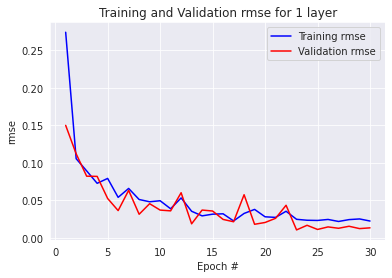

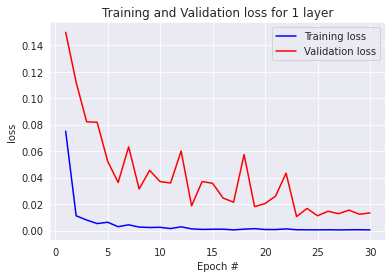

In [ ]:
sns.set_style("darkgrid")
#get the details form the history object
rmse = dic1['rmse']
val_rmse = dic1['val_rmse']
loss = dic1['loss']
val_loss = dic1['val_loss']

epochs = range(1, len(rmse) + 1)

#Train and validation accuracy
plt.plot(epochs, rmse, 'b', label='Training rmse')
plt.plot(epochs, val_rmse, 'r', label='Validation rmse')
plt.xlabel('Epoch #')
plt.ylabel('rmse')
plt.title('Training and Validation rmse for 1 layer')
plt.legend()


plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss for 1 layer')
plt.legend()

plt.show()


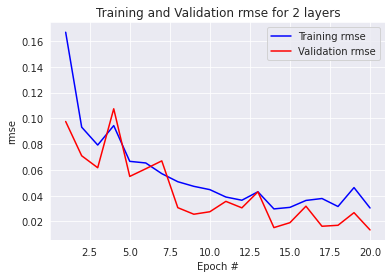

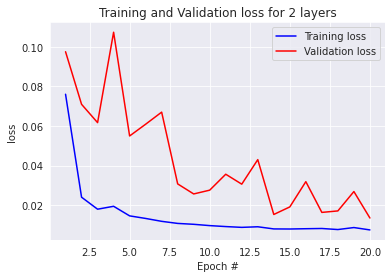

In [ ]:
sns.set_style("darkgrid")
#get the details form the history object
rmse = dic2['rmse']
val_rmse = dic2['val_rmse']
loss = dic2['loss']
val_loss = dic2['val_loss']

epochs = range(1, len(rmse) + 1)

#Train and validation accuracy
plt.plot(epochs, rmse, 'b', label='Training rmse')
plt.plot(epochs, val_rmse, 'r', label='Validation rmse')
plt.xlabel('Epoch #')
plt.ylabel('rmse')
plt.title('Training and Validation rmse for 2 layers')
plt.legend()


plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss for 2 layers')
plt.legend()

plt.show()

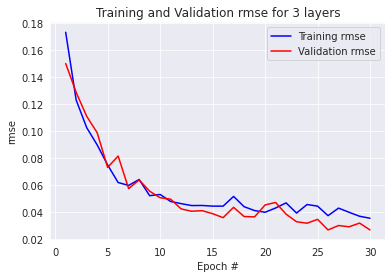

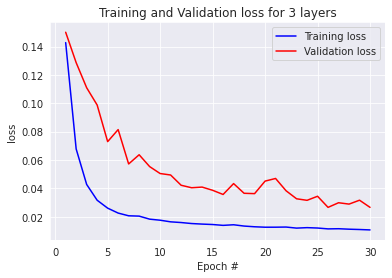

In [ ]:
sns.set_style("darkgrid")
#get the details form the history object
rmse = dic3['rmse']
val_rmse = dic3['val_rmse']
loss = dic3['loss']
val_loss = dic3['val_loss']

epochs = range(1, len(rmse) + 1)

#Train and validation accuracy
plt.plot(epochs, rmse, 'b', label='Training rmse')
plt.plot(epochs, val_rmse, 'r', label='Validation rmse')
plt.xlabel('Epoch #')
plt.ylabel('rmse')
plt.title('Training and Validation rmse for 3 layers')
plt.legend()


plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss for 3 layers')
plt.legend()

plt.show()